# OLA DRIVERS CHURN - ENSEMBLE LEARNING
# Problem Statement:

Recruiting and retaining drivers is seen by industry watchers as a tough battle for Ola. Churn among drivers is high and it’s very easy for drivers to stop working for the service on the fly or jump to Uber depending on the rates.

As the companies get bigger, the high churn could become a bigger problem. To find new drivers, Ola is casting a wide net, including people who don’t have cars for jobs. But this acquisition is really costly. Losing drivers frequently impacts the morale of the organization and acquiring new drivers is more expensive than retaining existing ones.

You are working as a data scientist with the Analytics Department of Ola, focused on driver team attrition. You are provided with the monthly information for a segment of drivers for 2019 and 2020 and tasked to predict whether a driver will be leaving the company or not based on their attributes like
* Demographics (city, age, gender etc.)
* Tenure information (joining date, Last Date)
* Historical data regarding the performance of the driver (Quarterly rating, Monthly business acquired, grade, Income)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV

from imblearn.over_sampling import SMOTE

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb

from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_auc_score, roc_curve

import time

In [ ]:
data=pd.read_csv('/content/ola_driver_scaler.csv')
data.head()

,Unnamed: 0,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,0,01-01-2019,1,28.0,0.0,C23,2,57387,24-12-2018,NaN,1,1,2381060,2
1,1,02-01-2019,1,28.0,0.0,C23,2,57387,24-12-2018,NaN,1,1,-665480,2
2,2,03-01-2019,1,28.0,0.0,C23,2,57387,24-12-2018,03-11-2019,1,1,0,2
3,3,11-01-2020,2,31.0,0.0,C7,2,67016,11-06-2020,NaN,2,2,0,1
4,4,12-01-2020,2,31.0,0.0,C7,2,67016,11-06-2020,NaN,2,2,0,1


In [ ]:
data.drop("Unnamed: 0", axis = 1, inplace = True)

In [ ]:
data.head()

,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,01-01-2019,1,28.0,0.0,C23,2,57387,24-12-2018,NaN,1,1,2381060,2
1,02-01-2019,1,28.0,0.0,C23,2,57387,24-12-2018,NaN,1,1,-665480,2
2,03-01-2019,1,28.0,0.0,C23,2,57387,24-12-2018,03-11-2019,1,1,0,2
3,11-01-2020,2,31.0,0.0,C7,2,67016,11-06-2020,NaN,2,2,0,1
4,12-01-2020,2,31.0,0.0,C7,2,67016,11-06-2020,NaN,2,2,0,1


In [ ]:
data.shape

(19104, 13)

In [ ]:
data.nunique()

,0
MMM-YY,24
Driver_ID,2381
Age,36
Gender,2
City,29
Education_Level,3
Income,2383
Dateofjoining,869
LastWorkingDate,493
Joining Designation,5


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   MMM-YY                19104 non-null  object 
 1   Driver_ID             19104 non-null  int64  
 2   Age                   19043 non-null  float64
 3   Gender                19052 non-null  float64
 4   City                  19104 non-null  object 
 5   Education_Level       19104 non-null  int64  
 6   Income                19104 non-null  int64  
 7   Dateofjoining         19104 non-null  object 
 8   LastWorkingDate       1616 non-null   object 
 9   Joining Designation   19104 non-null  int64  
 10  Grade                 19104 non-null  int64  
 11  Total Business Value  19104 non-null  int64  
 12  Quarterly Rating      19104 non-null  int64  
dtypes: float64(2), int64(7), object(4)
memory usage: 1.9+ MB


CONVERTING FEATURES TO RESPECTIVE DATA TYPES

In [ ]:
data["MMM-YY"] = pd.to_datetime(data["MMM-YY"])
data["Dateofjoining"] = pd.to_datetime(data["Dateofjoining"])
data["LastWorkingDate"] = pd.to_datetime(data["LastWorkingDate"], format='%d-%m-%Y', errors='coerce')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   MMM-YY                19104 non-null  datetime64[ns]
 1   Driver_ID             19104 non-null  int64         
 2   Age                   19043 non-null  float64       
 3   Gender                19052 non-null  float64       
 4   City                  19104 non-null  object        
 5   Education_Level       19104 non-null  int64         
 6   Income                19104 non-null  int64         
 7   Dateofjoining         19104 non-null  datetime64[ns]
 8   LastWorkingDate       1616 non-null   datetime64[ns]
 9   Joining Designation   19104 non-null  int64         
 10  Grade                 19104 non-null  int64         
 11  Total Business Value  19104 non-null  int64         
 12  Quarterly Rating      19104 non-null  int64         
dtypes: datetime64[ns

# Checking for missing values and Prepare data for KNN Imputation

In [ ]:
data.isnull().sum() / len(data) * 100


,0
MMM-YY,0.000000
Driver_ID,0.000000
Age,0.319305
Gender,0.272194
City,0.000000
Education_Level,0.000000
Income,0.000000
Dateofjoining,0.000000
LastWorkingDate,91.541039
Joining Designation,0.000000


* There are missing values found in AGE, Gender
* LastWorkingDate feature contains missing values which indicates the driver has not left the company yet.

In [ ]:
num_vars = data.select_dtypes(np.number)
num_vars.columns

Index(['Driver_ID', 'Age', 'Gender', 'Education_Level', 'Income',
       'Joining Designation', 'Grade', 'Total Business Value',
       'Quarterly Rating'],
      dtype='object')

In [ ]:
num_vars.drop(["Driver_ID"], axis = 1, inplace = True)

# KNN Imputation

In [ ]:
imputer = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')
imputer.fit(num_vars)
data_new = imputer.transform(num_vars)

In [ ]:
data_new = pd.DataFrame(data_new)


In [ ]:
data_new.columns = num_vars.columns


In [ ]:
data_new.isnull().sum()


,0
Age,0
Gender,0
Education_Level,0
Income,0
Joining Designation,0
Grade,0
Total Business Value,0
Quarterly Rating,0


we have successfully imputed the missing values using KNNImputer

In [ ]:
data_new.nunique()

,0
Age,70
Gender,6
Education_Level,3
Income,2383
Joining Designation,5
Grade,5
Total Business Value,10181
Quarterly Rating,4


# Concatenating Dataframes

In [ ]:
resultant_columns = list(set(data.columns).difference(set(num_vars)))
resultant_columns

['Dateofjoining', 'Driver_ID', 'MMM-YY', 'LastWorkingDate', 'City']

In [ ]:
new_df = pd.concat([data_new, data[resultant_columns]], axis=1)
new_df.shape

(19104, 13)

In [ ]:
new_df.head()

,Age,Gender,Education_Level,Income,Joining Designation,Grade,Total Business Value,Quarterly Rating,Dateofjoining,Driver_ID,MMM-YY,LastWorkingDate,City
0,28.0,0.0,2.0,57387.0,1.0,1.0,2381060.0,2.0,2018-12-24,1,2019-01-01,NaT,C23
1,28.0,0.0,2.0,57387.0,1.0,1.0,-665480.0,2.0,2018-12-24,1,2019-02-01,NaT,C23
2,28.0,0.0,2.0,57387.0,1.0,1.0,0.0,2.0,2018-12-24,1,2019-03-01,2019-11-03,C23
3,31.0,0.0,2.0,67016.0,2.0,2.0,0.0,1.0,2020-06-11,2,2020-11-01,NaT,C7
4,31.0,0.0,2.0,67016.0,2.0,2.0,0.0,1.0,2020-06-11,2,2020-12-01,NaT,C7


# Data Preprocessing
# Feature Engineering

In [ ]:
agg_functions = {
    "Age": "max",
    "Gender": "first",
    "Education_Level": "last",
    "Income": "last",
    "Joining Designation": "last",
    "Grade": "last",
    "Total Business Value": "sum",
    "Quarterly Rating": "last",
    "LastWorkingDate": "last",
    "City": "first",
    "Dateofjoining": "last"
}

processed_df = new_df.groupby(["Driver_ID", "MMM-YY"]).aggregate(agg_functions).sort_index(ascending = [True, True])

processed_df.head()

Age  Gender  Education_Level   Income  \
Driver_ID MMM-YY                                               
1         2019-01-01  28.0     0.0              2.0  57387.0   
          2019-02-01  28.0     0.0              2.0  57387.0   
          2019-03-01  28.0     0.0              2.0  57387.0   
2         2020-11-01  31.0     0.0              2.0  67016.0   
          2020-12-01  31.0     0.0              2.0  67016.0   

                      Joining Designation  Grade  Total Business Value  \
Driver_ID MMM-YY                                                         
1         2019-01-01                  1.0    1.0             2381060.0   
          2019-02-01                  1.0    1.0             -665480.0   
          2019-03-01                  1.0    1.0                   0.0   
2         2020-11-01                  2.0    2.0                   0.0   
          2020-12-01                  2.0    2.0                   0.0   

                      Quarterly Rating LastWorkingDate City Dateofjoining  
Driver_ID MMM-YY                                                           
1         2019-01-01               2.0             NaT  C23    2018-12-24  
          2019-02-01               2.0             NaT  C23    2018-12-24  
          2019-03-01               2.0      2019-11-03  C23    2018-12-24  
2         2020-11-01               1.0             NaT   C7    2020-06-11  
          2020-12-01               1.0             NaT   C7    2020-06-11

In [ ]:
final_data = pd.DataFrame()

In [ ]:
final_data["Driver_ID"] = new_df["Driver_ID"].unique()

In [ ]:
final_data['Age'] = processed_df.groupby('Driver_ID').max('MMM-YY')['Age']
final_data['Gender'] = processed_df.groupby('Driver_ID')['Gender'].last()
final_data['City'] = processed_df.groupby('Driver_ID')['City'].last()
final_data['Education'] = processed_df.groupby('Driver_ID')['Education_Level'].last()
final_data['Income'] = processed_df.groupby('Driver_ID')['Income'].last()
final_data['Joining_Designation'] = processed_df.groupby('Driver_ID')['Joining Designation'].last()
final_data['Grade'] = processed_df.groupby('Driver_ID')['Grade'].last()

# Ensure numeric only sum for Total Business Value
final_data['Total_Business_Value'] = (
    processed_df.groupby('Driver_ID').sum(numeric_only=True)['Total Business Value']
)

final_data['Last_Quarterly_Rating'] = processed_df.groupby('Driver_ID')['Quarterly Rating'].last()


In [ ]:
final_data.head()

,Driver_ID,Age,Gender,City,Education,Income,Joining_Designation,Grade,Total_Business_Value,Last_Quarterly_Rating
0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,28.0,0.0,C23,2.0,57387.0,1.0,1.0,1715580.0,2.0
2,4,31.0,0.0,C7,2.0,67016.0,2.0,2.0,0.0,1.0
3,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,6,43.0,0.0,C13,2.0,65603.0,2.0,2.0,350000.0,1.0


In [ ]:
final_data.shape

(2381, 10)

**Create a column which tells whether the quarterly rating has increased for that driver - for those whose quarterly rating has increased we assign the value 1**

In [ ]:
first_quarter = processed_df.groupby(["Driver_ID"]).agg({"Quarterly Rating": "first"})

last_quarter = processed_df.groupby(["Driver_ID"]).agg({"Quarterly Rating": "last"})

qr = (last_quarter["Quarterly Rating"] > first_quarter["Quarterly Rating"]).reset_index()

empid = qr[qr["Quarterly Rating"] == True]["Driver_ID"]

qrl = []
for i in final_data["Driver_ID"]:
    if i in empid.values:
        qrl.append(1)
    else:
        qrl.append(0)


final_data["Quarterly_Rating_Increased"] = qrl


In [ ]:
final_data.head()


,Driver_ID,Age,Gender,City,Education,Income,Joining_Designation,Grade,Total_Business_Value,Last_Quarterly_Rating,Salary_Increased,target,Quarterly_Rating_Increased
0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,0
1,2,28.0,0.0,C23,2.0,57387.0,1.0,1.0,1715580.0,2.0,0,0,0
2,4,31.0,0.0,C7,2.0,67016.0,2.0,2.0,0.0,1.0,0,1,0
3,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,0
4,6,43.0,0.0,C13,2.0,65603.0,2.0,2.0,350000.0,1.0,0,0,1


**Target variable creation: Create a column called target which tells whether the driver has left the company- driver whose last working day is present will have the value 1**

In [ ]:
lwd = (processed_df.groupby(["Driver_ID"]).agg({"LastWorkingDate": "last"})["LastWorkingDate"].isna()).reset_index()

lwrid = lwd[lwd["LastWorkingDate"] == True]["Driver_ID"]
target = []

for i in final_data["Driver_ID"]:
    if i in lwrid.values:
        target.append(0)
    else:
        target.append(1)

final_data["target"] = target

In [ ]:
final_data.head()


,Driver_ID,Age,Gender,City,Education,Income,Joining_Designation,Grade,Total_Business_Value,Last_Quarterly_Rating,Salary_Increased,target,Quarterly_Rating_Increased
0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,0
1,2,28.0,0.0,C23,2.0,57387.0,1.0,1.0,1715580.0,2.0,0,0,0
2,4,31.0,0.0,C7,2.0,67016.0,2.0,2.0,0.0,1.0,0,1,0
3,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,0
4,6,43.0,0.0,C13,2.0,65603.0,2.0,2.0,350000.0,1.0,0,0,1


Create a column which tells whether the monthly income has increased for that driver - for those whose monthly income has increased we assign the value 1

In [ ]:
mrf = processed_df.groupby(["Driver_ID"]).agg({"Income": "first"})

mrl = processed_df.groupby(["Driver_ID"]).agg({"Income": "last"})

mr = (mrl["Income"] > mrf["Income"]).reset_index()

empid = mr[mr["Income"] == True]["Driver_ID"]
income = []
for i in final_data["Driver_ID"]:
    if i in empid.values:
        income.append(1)
    else:
        income.append(0)

final_data["Salary_Increased"] = income

In [ ]:
final_data.head()


,Driver_ID,Age,Gender,City,Education,Income,Joining_Designation,Grade,Total_Business_Value,Last_Quarterly_Rating,Salary_Increased,target,Quarterly_Rating_Increased
0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,0
1,2,28.0,0.0,C23,2.0,57387.0,1.0,1.0,1715580.0,2.0,0,0,0
2,4,31.0,0.0,C7,2.0,67016.0,2.0,2.0,0.0,1.0,0,1,0
3,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,0
4,6,43.0,0.0,C13,2.0,65603.0,2.0,2.0,350000.0,1.0,0,0,1


# Statistical Summary

In [ ]:
final_data.describe().T


,count,mean,std,min,25%,50%,75%,max
Driver_ID,2381.0,1.397559e+03,8.061616e+02,1.0,695.0,1400.0,2100.0,2788.0
Age,2027.0,3.376073e+01,5.935144e+00,21.0,30.0,33.0,37.0,58.0
Gender,2027.0,4.124322e-01,4.918721e-01,0.0,0.0,0.0,1.0,1.0
Education,2027.0,1.015294e+00,8.140323e-01,0.0,0.0,1.0,2.0,2.0
Income,2027.0,5.934654e+04,2.816849e+04,10747.0,39438.0,55285.0,75769.0,188418.0
Joining_Designation,2027.0,1.826344e+00,8.386261e-01,1.0,1.0,2.0,2.0,5.0
Grade,2027.0,2.097188e+00,9.304156e-01,1.0,1.0,2.0,3.0,5.0
Total_Business_Value,2027.0,4.455381e+06,8.940578e+06,-1385530.0,0.0,749150.0,3986350.0,69867900.0
Last_Quarterly_Rating,2027.0,1.423286e+00,8.049762e-01,1.0,1.0,1.0,2.0,4.0
Salary_Increased,2381.0,1.805964e-02,1.331951e-01,0.0,0.0,0.0,0.0,1.0


* There are total of 2831 different drivers data.
* Age of drivers range from 21years to 58years.
* 75% drivers monthly income is <= 75986.
* 75% drivers acquired 4173650 as total business values.

In [ ]:
final_data.describe(include = 'object')


,City
count,2027
unique,29
top,C20
freq,127


* majority of drivers are coming from C20 city

In [ ]:
final_data["Gender"].value_counts()


,count
Gender,
0.0,1188
1.0,834
0.2,2
0.6,2
0.4,1


* Majority of drivers are male

In [ ]:
final_data["Education"].value_counts()


,count
Education,
2.0,687
1.0,684
0.0,656


* Majority of drivers have completed their Graduation

In [ ]:
final_data["target"].value_counts()


,count
target,
1,1616
0,765


Out of 2381 drivers 1616 have left the
company.


In [ ]:
n = ['Gender','Education','Joining_Designation','Grade','Last_Quarterly_Rating','Quarterly_Rating_Increased']

for i in n:
    print("------------------------------------------------------------")
    print(final_data[i].value_counts(normalize=True) * 100)

------------------------------------------------------------
Gender
0.0    58.608781
1.0    41.144549
0.2     0.098668
0.6     0.098668
0.4     0.049334
Name: proportion, dtype: float64
------------------------------------------------------------
Education
2.0    33.892452
1.0    33.744450
0.0    32.363098
Name: proportion, dtype: float64
------------------------------------------------------------
Joining_Designation
1.0    42.624568
2.0    34.385792
3.0    21.164282
4.0     1.381352
5.0     0.444006
Name: proportion, dtype: float64
------------------------------------------------------------
Grade
2.0    36.309817
1.0    30.636408
3.0    26.689689
4.0     5.426739
5.0     0.937346
Name: proportion, dtype: float64
------------------------------------------------------------
Last_Quarterly_Rating
1.0    73.458313
2.0    15.145535
3.0     7.005427
4.0     4.390725
Name: proportion, dtype: float64
------------------------------------------------------------
Quarterly_Rating_Increased
0  

* 58% of drivers are male while female constitutes around 40%
* 33% of drivers have completed graduation and 12+ education
* 43% of drivers have 1 as joining_designation
* Around 36% of drivers graded as 2
* Around 73% of drivers rated as 1 on last quarter
* Only 15% of drivers rating has been increased on quarterly

# Univariate Analysis

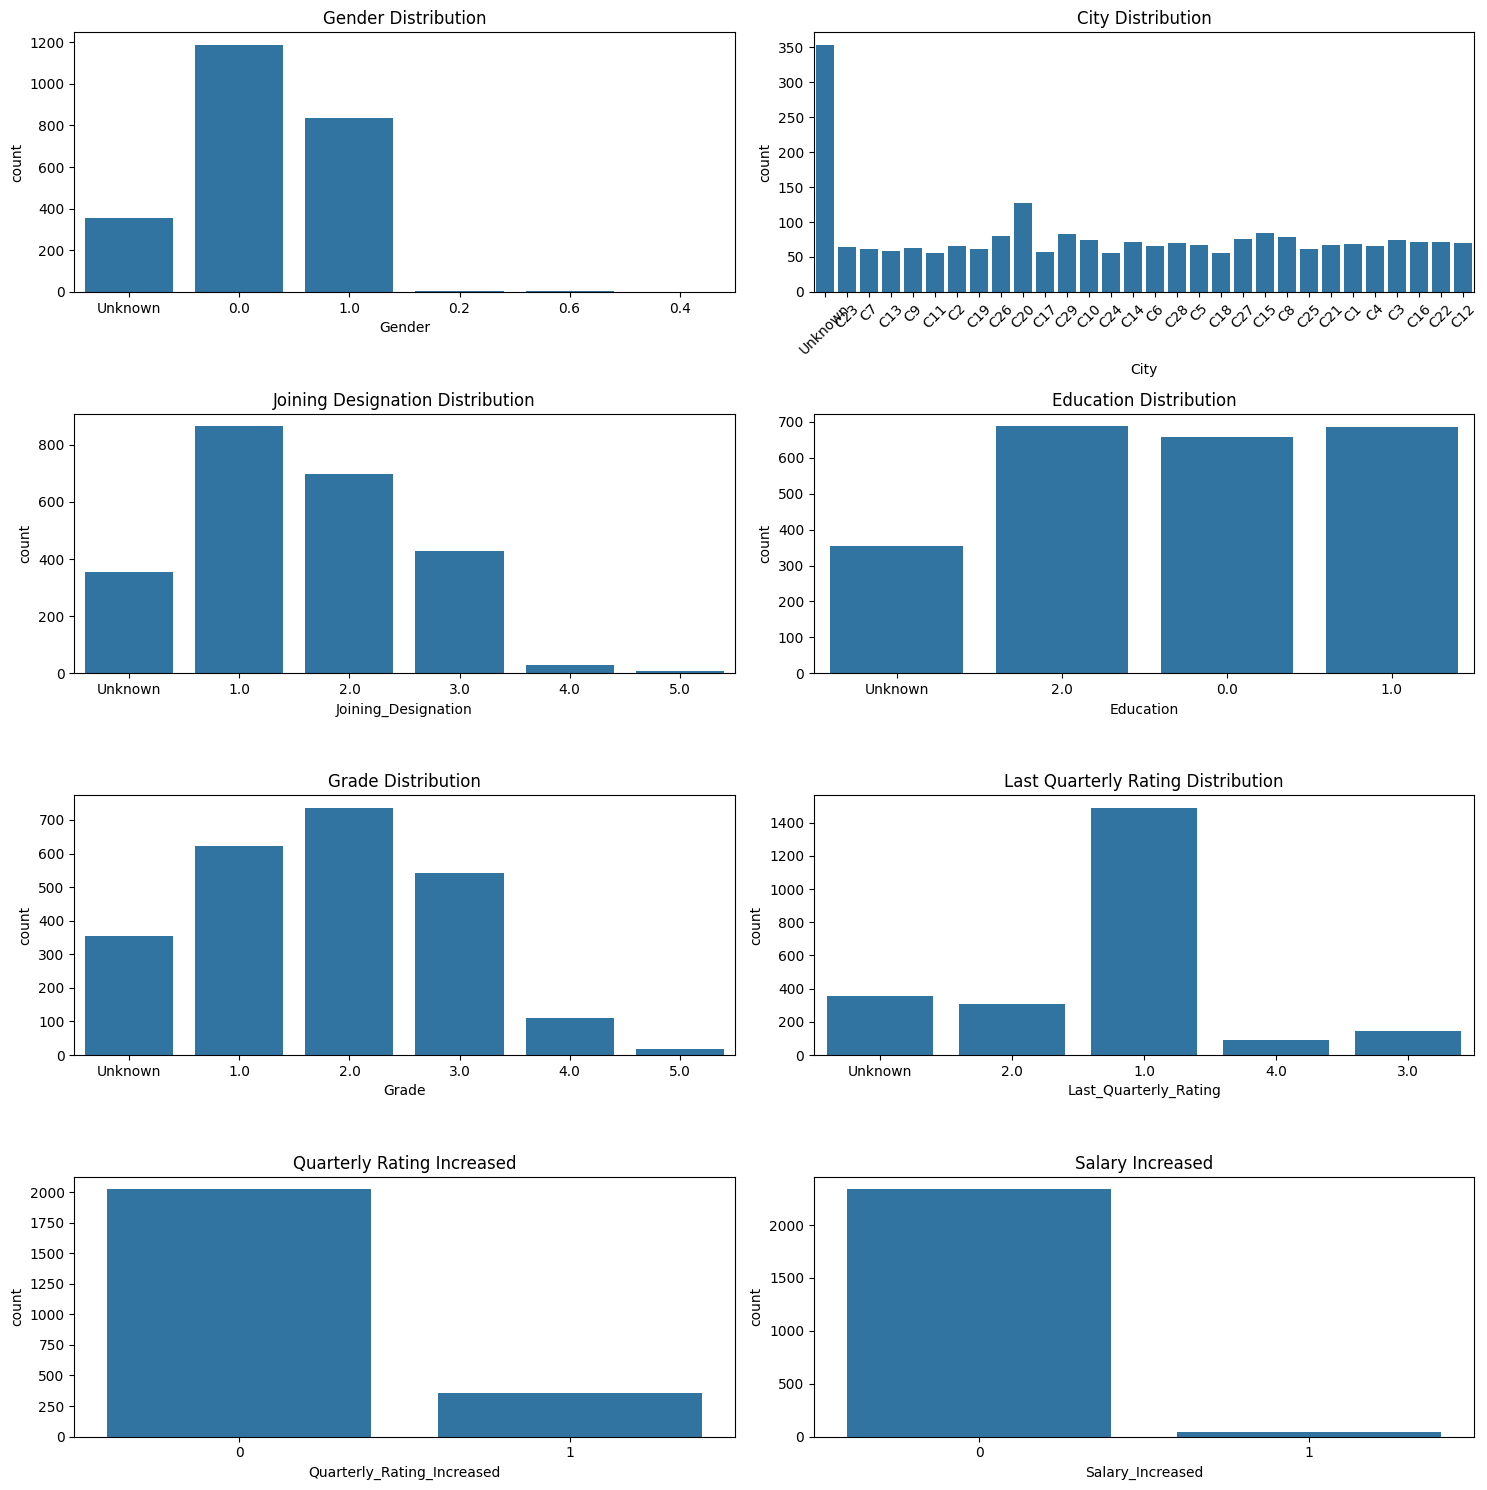

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Check for missing columns or NaN values
required_columns = [
    "Gender", "City", "Joining_Designation", "Education",
    "Grade", "Last_Quarterly_Rating", "Quarterly_Rating_Increased", "Salary_Increased"
]
missing_columns = [col for col in required_columns if col not in final_data.columns]
if missing_columns:
    print(f"Missing columns: {missing_columns}")
else:
    # Fill NaN with a placeholder or drop rows if necessary
    final_data = final_data.fillna("Unknown")  # Replace "Unknown" with appropriate values if needed

    # Plotting
    plt.figure(figsize=(15, 15))

    plt.subplot(421)
    sns.countplot(data=final_data, x="Gender")
    plt.title("Gender Distribution")

    plt.subplot(422)
    sns.countplot(data=final_data, x="City")
    plt.xticks(rotation=45)
    plt.title("City Distribution")

    plt.subplot(423)
    sns.countplot(data=final_data, x="Joining_Designation")
    plt.title("Joining Designation Distribution")

    plt.subplot(424)
    sns.countplot(data=final_data, x="Education")
    plt.title("Education Distribution")

    plt.subplot(425)
    sns.countplot(data=final_data, x="Grade")
    plt.title("Grade Distribution")

    plt.subplot(426)
    sns.countplot(data=final_data, x="Last_Quarterly_Rating")
    plt.title("Last Quarterly Rating Distribution")

    plt.subplot(427)
    sns.countplot(data=final_data, x="Quarterly_Rating_Increased")
    plt.title("Quarterly Rating Increased")

    plt.subplot(428)
    sns.countplot(data=final_data, x="Salary_Increased")
    plt.title("Salary Increased")

    plt.tight_layout()
    plt.show()


**insights**

* Out of 2381 employees, 1404 employees are of the Male gender and 977 are females.
* Out of 2381 employees, 152 employees are from city C20 and 101 from city C15.
* Out of 2381 employees, 802 employees have their education as Graduate and 795 have completed their 12.
* Out of 2381 employees, 1026 joined with the grade as 1, 815 employees joined with the grade 2.
* Out of 2381 employees, 855 employees had their designation as 2 at the time of reporting.
* Out of 2381 employees, 1744 employees had their last quarterly rating as 1.
* Out of 2381 employees, the quarterly rating has not increased for 2076 employees.

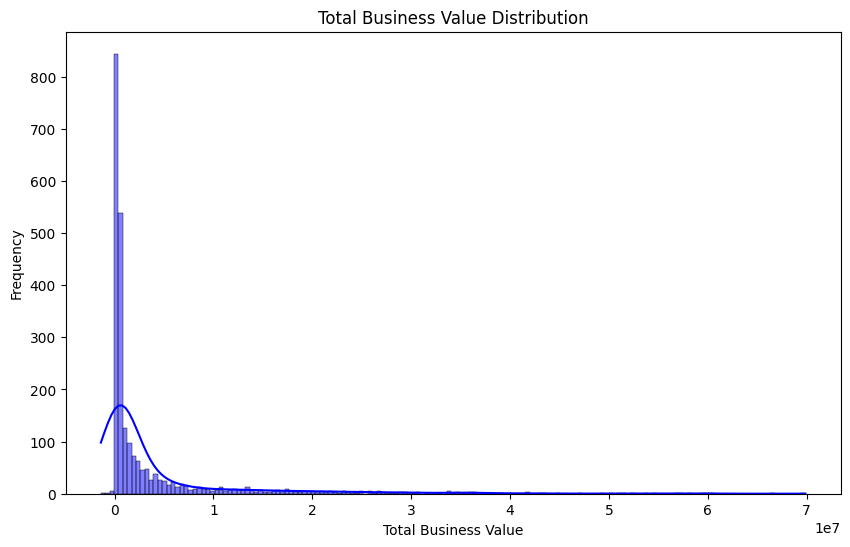

In [ ]:
# Ensure 'Total_Business_Value' is numeric and handle any missing values
final_data['Total_Business_Value'] = pd.to_numeric(final_data['Total_Business_Value'], errors='coerce')
final_data['Total_Business_Value'] = final_data['Total_Business_Value'].fillna(final_data['Total_Business_Value'].median())  # or use .dropna() if you want to drop

# Plotting the histogram with kde for 'Total_Business_Value'
plt.figure(figsize=(10, 6))
sns.histplot(final_data['Total_Business_Value'], color='blue', kde=True)
plt.title("Total Business Value Distribution")
plt.xlabel("Total Business Value")
plt.ylabel("Frequency")
plt.show()

The distribution of total business value highly skewed on right which might indicate the outliers in the data

# Bi-Variate Analysis

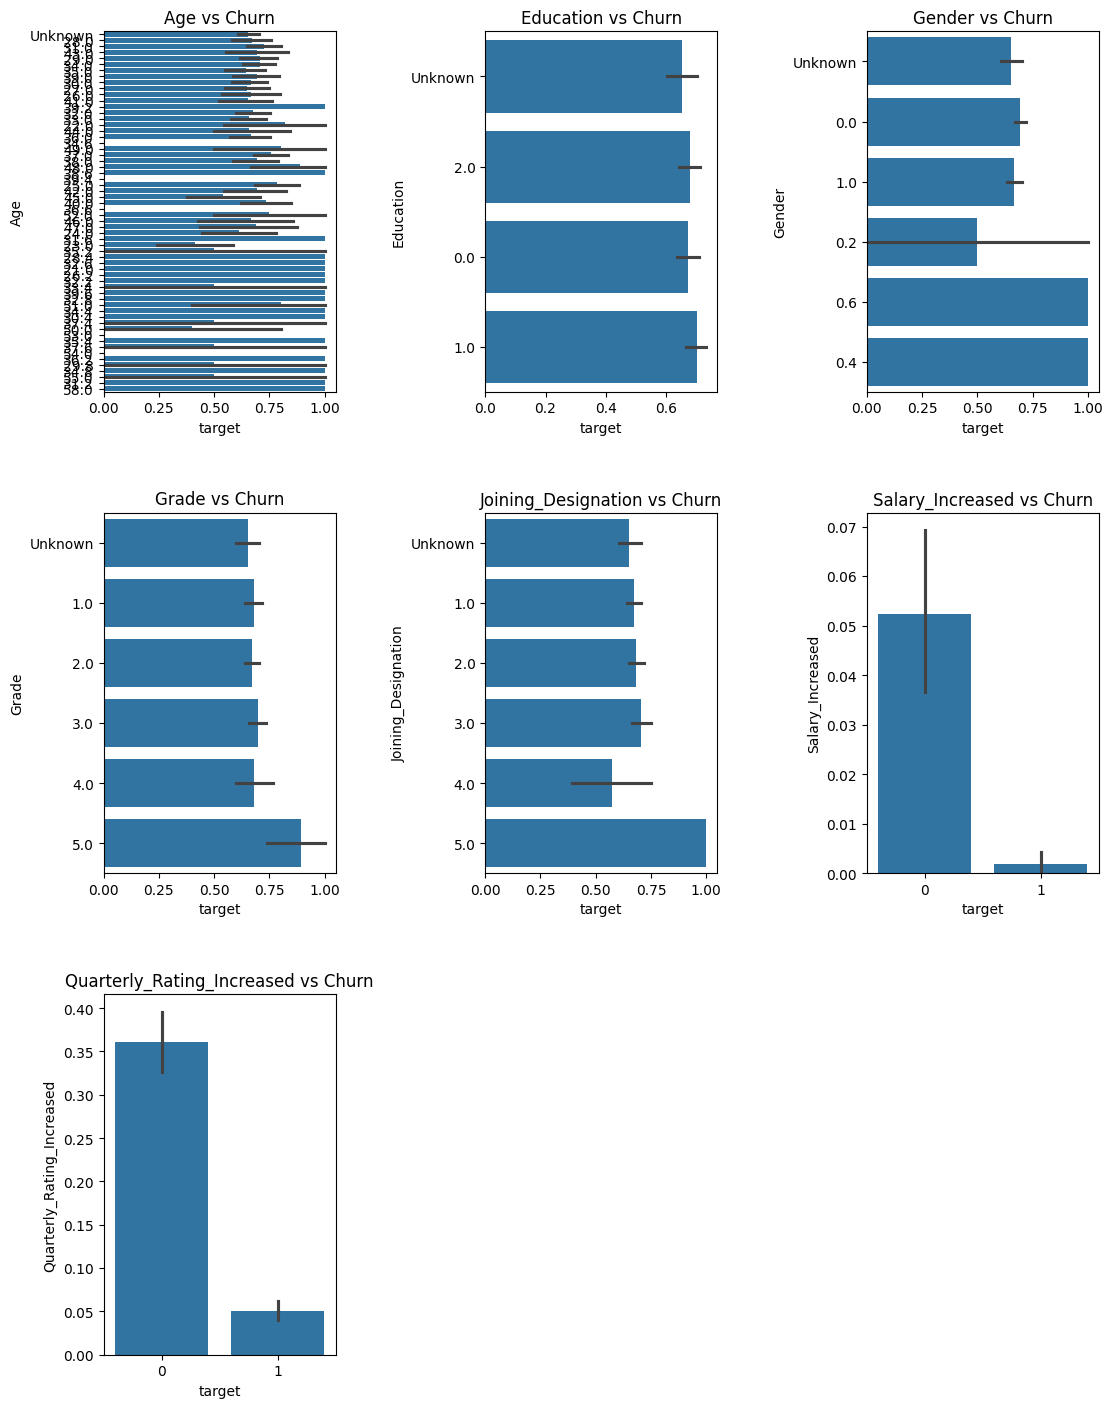

In [ ]:
# Set up the figure and grid layout for subplots
plt.figure(figsize=(12, 15))

# Plot 1: Age vs Churn
plt.subplot(331)  # 3 rows, 3 columns, 1st plot
sns.barplot(data=final_data, x="target", y="Age")
plt.title("Age vs Churn")

# Plot 2: Education vs Churn
plt.subplot(332)  # 3 rows, 3 columns, 2nd plot
sns.barplot(data=final_data, x="target", y="Education")
plt.title("Education vs Churn")

# Plot 3: Gender vs Churn
plt.subplot(333)  # 3 rows, 3 columns, 3rd plot
sns.barplot(data=final_data, x="target", y="Gender")
plt.title("Gender vs Churn")

# Plot 4: Grade vs Churn
plt.subplot(334)  # 3 rows, 3 columns, 4th plot
sns.barplot(data=final_data, x="target", y="Grade")
plt.title("Grade vs Churn")

# Plot 5: Joining_Designation vs Churn
plt.subplot(335)  # 3 rows, 3 columns, 5th plot
sns.barplot(data=final_data, x="target", y="Joining_Designation")
plt.title("Joining_Designation vs Churn")

# Plot 6: Salary_Increased vs Churn
plt.subplot(336)  # 3 rows, 3 columns, 6th plot
sns.barplot(data=final_data, x="target", y="Salary_Increased")
plt.title("Salary_Increased vs Churn")

# Plot 7: Quarterly_Rating_Increased vs Churn
plt.subplot(337)  # 3 rows, 3 columns, 7th plot
sns.barplot(data=final_data, x="target", y="Quarterly_Rating_Increased")
plt.title("Quarterly_Rating_Increased vs Churn")

# Adjust layout to prevent overlapping titles and labels
plt.tight_layout(pad=4)

# Show the plots
plt.show()


**insights**

* The proportion of Age, gender and education is more or less the same for both the employees who left the organization and those who did not leave.
* The employees who have their grade as 3 or 4 at the time of joining are less likely to leave the organization.
* The employees whose quarterly rating has increased are less likely to leave the organization.
* The employees whose monthly salary has not increased are more likely to leave the organization.

# Correlation Analysis

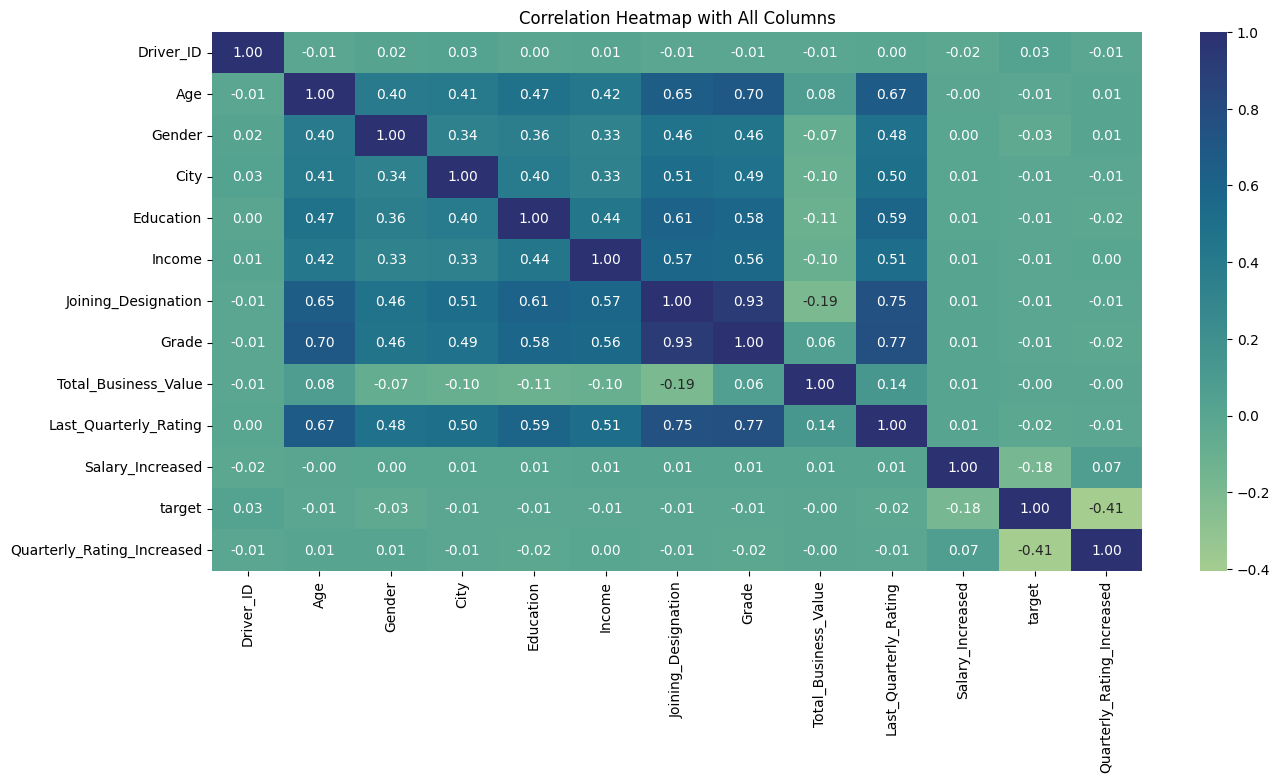

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Copy the dataframe to avoid changing the original data
df_encoded = final_data.copy()

# Encode non-numeric columns using Label Encoding
label_encoder = LabelEncoder()

# Apply label encoding to each non-numeric column
for column in df_encoded.select_dtypes(exclude=['number']).columns:
    df_encoded[column] = label_encoder.fit_transform(df_encoded[column].astype(str))

# Handle missing values (you can use a different strategy, such as filling with mean or median)
df_encoded = df_encoded.fillna(df_encoded.mean())

# Calculate the correlation matrix
corr_matrix = df_encoded.corr(method="pearson")

# Plot the heatmap
plt.figure(figsize=(15, 7))
sns.heatmap(corr_matrix, annot=True, cmap="crest", fmt='.2f')
plt.title("Correlation Heatmap with All Columns")
plt.show()


**insights**

* Income and Grade is highly correlated
* Joining Designation and Grade is highly correlated
* Total Business value and salary increament is correlated

# One-Hot Encoding
As there is only one categorical values in our dataset. We will opt one hot encoder to convert it to numerical.

In [ ]:
final_data = pd.concat([final_data, final_data['City']], axis=1)

In [ ]:
final_data.shape


(2381, 14)

# Standardization (for training data)

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

# Drop the non-numeric columns that shouldn't be in X (Driver_ID, target, City)
X = final_data.drop(["Driver_ID", "target", "City"], axis=1)

# Encode non-numeric columns using Label Encoding (for categorical data)
label_encoder = LabelEncoder()

# Apply label encoding to each non-numeric column
for column in X.select_dtypes(exclude=['number']).columns:
    X[column] = label_encoder.fit_transform(X[column].astype(str))

# Handle missing values (fill NaN values with the mean)
X = X.fillna(X.mean())

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Scale the features
X_scaled = scaler.fit_transform(X)

# Optionally, if you want the result as a DataFrame again:
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# Now, X_scaled_df contains the scaled data


In [ ]:
X = pd.DataFrame(X)

X.columns = X_cols

X

,Age,Gender,Education,Income,Joining_Designation,Grade,Total_Business_Value,Last_Quarterly_Rating,Salary_Increased,Quarterly_Rating_Increased
0,59,5,3,1997,5,5,749150.0,4,0,0
1,8,0,2,1260,0,0,1715580.0,1,0,0
2,14,0,2,1516,1,1,0.0,0,0,0
3,59,5,3,1997,5,5,749150.0,4,0,0
4,45,0,2,1480,1,1,350000.0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
2376,59,5,3,1997,5,5,749150.0,4,0,1
2377,23,4,2,311,0,0,328190.0,0,0,0
2378,12,4,1,1826,2,2,0.0,0,0,0
2379,8,0,2,1199,2,2,4817790.0,0,0,0


# Train & Test Split

In [ ]:
y = final_data["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7, shuffle=True)

In [ ]:
print("X_train Shape: ", X_train.shape)
print("X_test Shape: ", X_test.shape)
print("y_train Shape: ", y_train.shape)
print("y_test Shape: ", y_test.shape)

X_train Shape:  (1904, 10)
X_test Shape:  (477, 10)
y_train Shape:  (1904,)
y_test Shape:  (477,)


# Random Forest Classifier - Before Balancing
**Keeping max_depth small to avoid overfitting**



In [ ]:
params = {
    "max_depth": [2, 3, 4],
    "n_estimators": [50, 100, 150, 200],
}

start_time = time.time()
random_forest = RandomForestClassifier(class_weight="balanced")
c = GridSearchCV(estimator=random_forest, param_grid=params, n_jobs=-1, cv=3, verbose=True, scoring='f1')

c.fit(X_train, y_train)

print("Best Params: ", c.best_params_)
print("Best Score: ", c.best_score_)
elapsed_time = time.time() - start_time

print("\nElapsed Time: ", elapsed_time)

Fitting 3 folds for each of 12 candidates, totalling 36 fits
Best Params:  {'max_depth': 2, 'n_estimators': 200}
Best Score:  0.8446323650358244

Elapsed Time:  22.72230577468872


              precision    recall  f1-score   support

           0       0.82      0.41      0.54       148
           1       0.78      0.96      0.86       329

    accuracy                           0.79       477
   macro avg       0.80      0.68      0.70       477
weighted avg       0.79      0.79      0.76       477



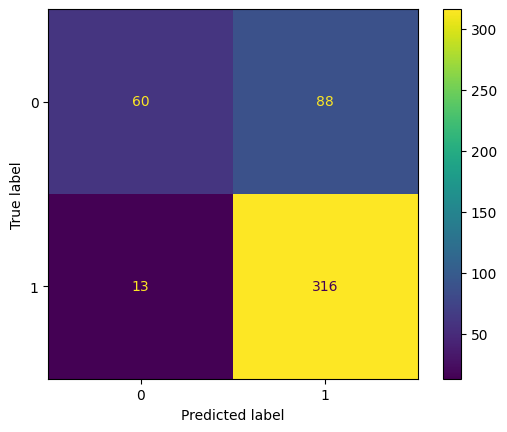

In [ ]:
y_pred = c.predict(X_test)

print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=c.classes_).plot()

**Random Forest Classifier with balanced class weight**

* Out of all prediction, the measure for correctly predicted 0 is 73% and for 1 is 82% (Precision)
* Out of all actual 0, the measure for correctly predicted is 57% and for 1 is 90% (Recall)

**As this is imbalanced dataset. We give importance to F1-Score metrics**

* F1 Score of 0 is 64%
* F! Score of 1 is 86%

**Lets try out bootstrapped random forest using subsample**

In [ ]:
params = {
    "max_depth": [2, 3, 4],
    "n_estimators": [50, 100, 150, 200],
}

start_time = time.time()
random_forest = RandomForestClassifier(class_weight="balanced_subsample")
c = GridSearchCV(estimator=random_forest, param_grid=params, n_jobs=-1, cv=3, verbose=True, scoring='f1')

c.fit(X_train, y_train)

print("Best Params: ", c.best_params_)
print("Best Score: ", c.best_score_)
elapsed_time = time.time() - start_time

print("\nElapsed Time: ", elapsed_time)

Fitting 3 folds for each of 12 candidates, totalling 36 fits
Best Params:  {'max_depth': 4, 'n_estimators': 200}
Best Score:  0.844939890076834

Elapsed Time:  19.350056648254395


**Random Forest Classifier with balanced class weight**

* Out of all prediction, the measure for correctly predicted 0 is 75% and for 1 is 83% (Precision)
* Out of all actual 0, the measure for correctly predicted is 57% and for 1 is 91% (Recall)

**As this is imbalanced dataset. We give importance to F1-Score metrics**

* F1 Score of 0 is 65%
* F! Score of 1 is 87%

**There is not much significant difference in the matrices observed for bootstrapped Random Forest and Weighted Random Forest**

**Lets try balancing**

# Balancing Dataset using SMOTE

**As the target variable is imbalanced towards 1. We will use SMOTE to balance the dataset**

In [ ]:
("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))

sm = SMOTE(random_state = 7)
X_train, y_train = sm.fit_resample(X_train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train == 0)))

Before OverSampling, counts of label '0': 617 

After OverSampling, the shape of train_X: (2574, 10)
After OverSampling, the shape of train_y: (2574,) 

After OverSampling, counts of label '1': 1287
After OverSampling, counts of label '0': 1287


<ipython-input-118-3c4cba79303f>:5: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  X_train, y_train = sm.fit_resample(X_train, y_train.ravel())
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-l

# Ensemble Learning : Bagging

Fitting 3 folds for each of 12 candidates, totalling 36 fits
Best Params:  {'max_depth': 3, 'n_estimators': 50}
Best Score:  0.691009328779789

Elapsed Time:  26.958402633666992
              precision    recall  f1-score   support

           0       0.61      0.45      0.52       148
           1       0.78      0.87      0.82       329

    accuracy                           0.74       477
   macro avg       0.69      0.66      0.67       477
weighted avg       0.73      0.74      0.73       477



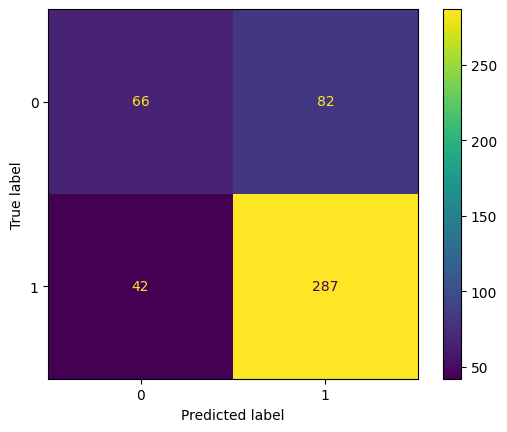

In [ ]:
params = {
    "max_depth": [2, 3, 4],
    "n_estimators": [50, 100, 150, 200],
}

start_time = time.time()
random_forest = RandomForestClassifier(class_weight="balanced_subsample")
c = GridSearchCV(estimator=random_forest, param_grid=params, n_jobs=-1, cv=3, verbose=True, scoring='f1')

c.fit(X_train, y_train)

print("Best Params: ", c.best_params_)
print("Best Score: ", c.best_score_)
elapsed_time = time.time() - start_time

print("\nElapsed Time: ", elapsed_time)

y_pred = c.predict(X_test)

print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=c.classes_).plot()

**Random Forest Classifier with balanced class weight**

* Out of all prediction, the measure for correctly predicted 0 is 74% and for 1 is 83% (Precision)
* Out of all actual 0, the measure for correctly predicted is 57% and for 1 is 91% (Recall)

**As this is imbalanced dataset. We give importance to F1-Score metrics**

* F1 Score of 0 is 65%
* F! Score of 1 is 87%

# ROC-AUC Curve

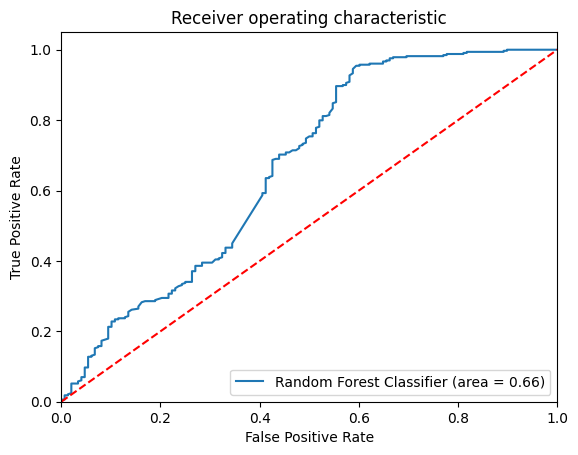

In [ ]:
logit_roc_auc=roc_auc_score(y_test,y_pred)
fpr,tpr,thresholds=roc_curve(y_test,c.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr,tpr,label='Random Forest Classifier (area = %0.2f)' % logit_roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

# Ensemble Learning : Boosting

# Gradient Boosting Classifier

Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best Params:  {'subsample': 0.8, 'n_estimators': 50, 'max_depth': 4, 'loss': 'log_loss', 'learning_rate': 0.2}
Best Score:  0.6903651903651903

Elapsed Time:  28.75942826271057
              precision    recall  f1-score   support

           0       0.55      0.48      0.51       148
           1       0.78      0.82      0.80       329

    accuracy                           0.71       477
   macro avg       0.66      0.65      0.65       477
weighted avg       0.71      0.71      0.71       477



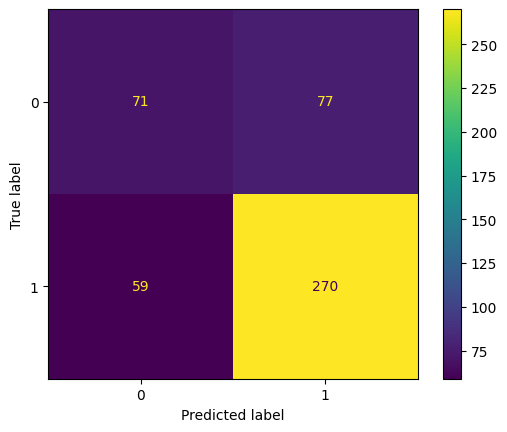

In [ ]:
# Define parameter distribution for RandomizedSearchCV
params = {
    "max_depth": [2, 3, 4, 5],
    "loss": ["log_loss", "exponential"],
    "subsample": [0.1, 0.2, 0.5, 0.8, 1],
    "learning_rate": [0.1, 0.2, 0.3],
    "n_estimators": [50, 100, 150, 200]
}

# Initialize the model
gbdt = GradientBoostingClassifier()

# RandomizedSearchCV with a smaller number of iterations for faster execution
start_time = time.time()

c = RandomizedSearchCV(estimator=gbdt, param_distributions=params, cv=3, n_jobs=-1, verbose=True, n_iter=20, random_state=42)

# Fit the model
c.fit(X_train, y_train)

# Output the best parameters and score
print("Best Params: ", c.best_params_)
print("Best Score: ", c.best_score_)

# Measure elapsed time
elapsed_time = time.time() - start_time
print("\nElapsed Time: ", elapsed_time)

# Make predictions and evaluate
y_pred = c.predict(X_test)
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=c.classes_).plot()


**Gradient Boosting Classifier Metrics**

* Out of all prediction, the measure for correctly predicted 0 is 62% and for 1 is 82% (Precision)
* Out of all actual 0, the measure for correctly predicted is 60% and for 1 is 83% (Recall)

**As this is imbalanced dataset. We give importance to F1-Score metrics**

* F1 Score of 0 is 61%
* F1 Score of 1 is 83%

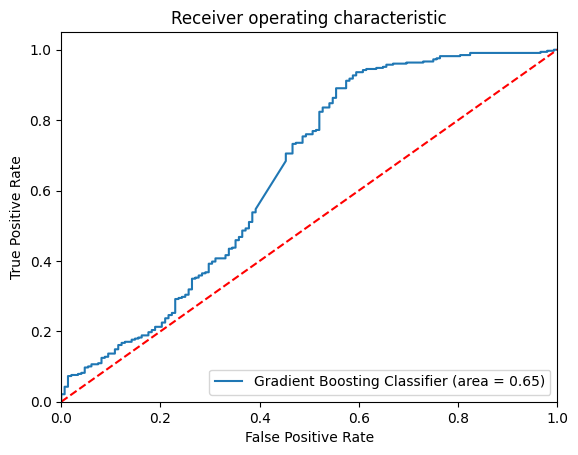

In [ ]:
logit_roc_auc=roc_auc_score(y_test,y_pred)
fpr,tpr,thresholds=roc_curve(y_test,c.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr,tpr,label='Gradient Boosting Classifier (area = %0.2f)' % logit_roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

# XGBoost Classifier

XGBoost Classifier Score:  0.7023060796645703

               precision    recall  f1-score   support

           0       0.52      0.44      0.48       148
           1       0.76      0.82      0.79       329

    accuracy                           0.70       477
   macro avg       0.64      0.63      0.63       477
weighted avg       0.69      0.70      0.69       477



/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:31:46] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


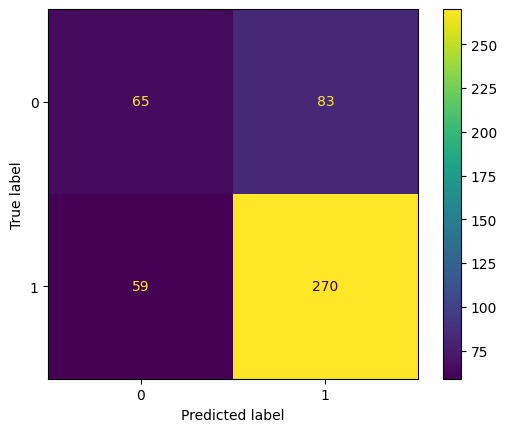

In [ ]:
model = xgb.XGBClassifier(class_weight = "balanced")

model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("XGBoost Classifier Score: ", model.score(X_test, y_test))
print("\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_).plot()

**XGBoost Classifier with balanced class weight**

* Out of all prediction, the measure for correctly predicted 0 is 62% and for 1 is 81% (Precision)
* Out of all actual 0, the measure for correctly predicted is 57% and for 1 is 84% (Recall)

**As this is imbalanced dataset. We give importance to F1-Score metrics**

* F1 Score of 0 is 60%
* F1 Score of 1 is 83%

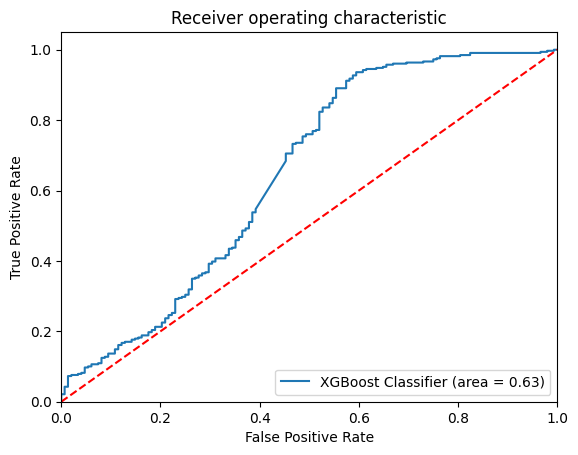

In [ ]:
logit_roc_auc=roc_auc_score(y_test,y_pred)
fpr,tpr,thresholds=roc_curve(y_test,c.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr,tpr,label='XGBoost Classifier (area = %0.2f)' % logit_roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

# Final Result Evaluation
* We observe that we are not getting very high recall on target 0 which may be due to small unbalanced dataset.
* Higher precision means that an algorithm returns more relevant results than irrelevant ones, and high recall means that an algorithm returns most of the relevant results (whether or not irrelevant ones are also returned).

**We observe that Random Forest with SMOTE outperforms rest of the models and has higher recall and precision values.**
* The Random Forest method out of all predicted 0 the measure of correctly predicted is 73%, and for 1 it is 82%(Precision).
* The Random Forest method out of all actual 0 the measure of correctly predicted is 56%, and for 1 it is 91%(Recall).
* The ROC-AUC curve area for Random Forest Classifier is 0.74

**Gradient Boosting Classifier Result**
* Out of all prediction, the measure for correctly predicted 0 is 62% and for 1 is 82% (Precision)
* Out of all actual 0, the measure for correctly predicted is 60% and for 1 is 83% (Recall)
* The ROC-AUC curve area for Gradient Boosting Decision Tree Classifier is 0.71

**XGBoost Classifier Result**
* Out of all prediction, the measure for correctly predicted 0 is 62% and for 1 is 81% (Precision)
* Out of all actual 0, the measure for correctly predicted is 57% and for 1 is 84% (Recall)
* The ROC-AUC curve area for XGBoost Classifier is 0.71

# Feature Importance of the best model so far.

**Random Forest Classifier outperforms the rest of the model.**

**Best parameters**

Best Params: {'max_depth': 4, 'n_estimators': 50}

In [ ]:
rf = RandomForestClassifier(max_depth = 4, n_estimators= 50, class_weight="balanced")

rf.fit(X_train, y_train)
print("Score of RandomForestClassifier: ", rf.score(X_test, y_test))

Score of RandomForestClassifier:  0.70020964360587


In [ ]:
importances = rf.feature_importances_
importances

array([0.05899536, 0.12020252, 0.07879843, 0.07615343, 0.03703553,
       0.05519783, 0.03496343, 0.01645607, 0.0454211 , 0.4767763 ])

In [ ]:
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)

<Figure size 1500x700 with 0 Axes>

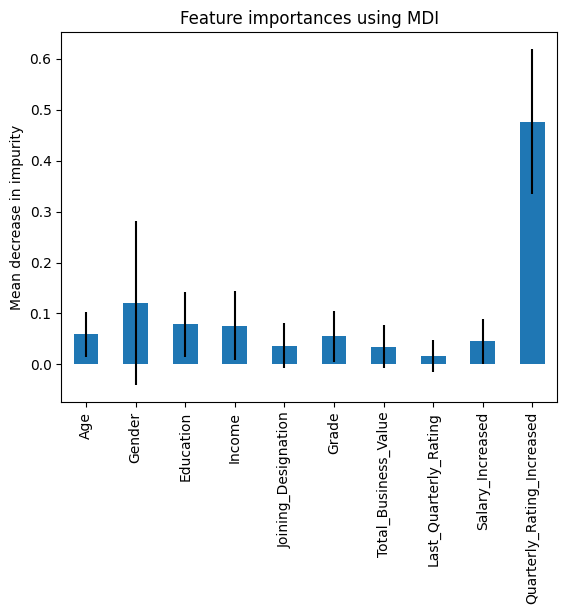

In [ ]:
feature_importances = pd.Series(importances, X_train.columns)

plt.figure(figsize=(15,7))
fig, ax = plt.subplots()
feature_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")

plt.show()

**Insights**

* Last_Quarterly_Rating, Total_Business_Value & Quarterly_Rating_Increased are the most important features.

# Actionable Insights and Recommendation

* Out of 2381 drivers 1616 have left the company.
* We need to incentivise the drivers overtime or other perks to overcome churning
* The employees whose quarterly rating has increased are less likely to leave the organization.
* Company needs to implement the reward system for the customer who provide the feedback and rate drivers
* The employees whose monthly salary has not increased are more likely to leave the organization.
* Company needs to get in touch with those drivers whose monthly salary has not increased and help them out to earn more by provider bonus and perks.
* Out of 2381 employees, 1744 employees had their last quarterly rating as 1.
* Out of 2381 employees, the quarterly rating has not increased for 2076 employees. This is red flag for the company which needs to regulate.
* Company needs to look why customers are not rating drivers.
* Last_Quarterly_Rating, Total_Business_Value & Quarterly_Rating_Increased are the most important features. Company needs to tracks these features as predicators
* We observe that we are not getting very high recall on target 0 which may be due to small unbalanced dataset. More data will overcome this issue.
* The Random Forest Classifier attains the Recall score of 91% for the driver who left the company. Which indicates that model is performing the decent job.

# Questionnaire

**1. What percentage of drivers have received a quarterly rating of 5?**

None of the drivers in the given data set have recieved a Quarterly rating of 5.0.

**2. Comment on the correlation between Age and Quarterly Rating.**

Weak Positive Correlation: The correlation coefficient of 0.23 indicates a weak positive linear relationship between Age and Quarterly Rating. As the value is positive, it suggests that as Age increases, there tends to be a slight increase in Quarterly Rating on average.

**3. Name the city which showed the most improvement in Quarterly Rating over the past year.**

C3 and C21 showed the most improvement in Quarterly Rating over the past year.


**4. Drivers with a Grade of ‘A’ are more likely to have a higher Total Business Value. (T/F)**

False. A higher total business value is more likely to be associated with drivers having a higher grade but not vice versa. It can be visualized from the graph density of the drivers for all grades is more towards the low total business value however the maximum total business value increases with the increase in grade.

**5. If a driver's Quarterly Rating drops significantly, how does it impact their Total Business Value in the subsequent period?**

If a driver's Quarterly Rating drops significantly, the Total Business Value also drops significantly for the driver.

**6. From Ola's perspective, which metric should be the primary focus for driver retention?**

* **ROC AUC**
* **Precision**
* **Recall**
* **F1 Score**


* In scenarios where the consequences of false negatives (predicting a driver will not churn but they actually do) outweigh those of false positives (predicting a driver will churn but they do not), maximizing Recall may indeed be more appropriate.

* Maximizing Recall would prioritize identifying all potentially churn-prone drivers, even if it means some false positives occur. This approach aims to minimize the risk of missing drivers who are genuinely at risk of leaving the platform.

**7. How does the gap in precision and recall affect Ola's relationship with its drivers and customers?**

* The gap between precision and recall can have significant impact on Ola's relationship with its drivers and customers:

**Driver Relationship:**

**High Precision, Low Recall:** If Ola prioritizes precision over recall, it means that the company is focusing on accurately identifying drivers who meet certain criteria (e.g., high-performance drivers, drivers with positive customer ratings). This can lead to better driver satisfaction as it ensures that drivers who receive incentives, rewards, or recognition truly deserve it based on their performance. However, it may also result in missing out on some deserving drivers who might be overlooked due to the stringent criteria, potentially leading to dissatisfaction among those drivers.

**Low Precision, High Recall:**
Conversely, if Ola prioritizes recall over precision, it means that the company is casting a wider net to include a larger number of drivers who meet certain criteria. While this approach may ensure that deserving drivers are not overlooked, it may also lead to rewarding drivers who do not truly deserve it, potentially causing dissatisfaction among drivers who feel that rewards are being distributed unfairly.

**Customer Relationship:**

**High Precision, Low Recall:** A high precision means that Ola's algorithms accurately identify and recommend drivers who provide exceptional service, leading to higher customer satisfaction. Customers are more likely to receive a reliable and high-quality service when matched with drivers who have a proven track record of performance. However, if the recall is low, it means that Ola may miss out on recommending some high-quality drivers, leading to potential dissatisfaction among customers who receive subpar service from drivers who were not identified by the algorithm.

**Low Precision, High Recall:** A focus on high recall ensures that Ola's algorithms cast a wider net to include a larger pool of drivers, increasing the chances of matching customers with available drivers. While this approach may lead to more reliable service availability, it also increases the likelihood of recommending drivers who may not provide the best service quality. This could result in customer dissatisfaction if they have negative experiences with drivers who were recommended by the algorithm based on high recall but do not meet the expected service standards.

In summary, the gap between precision and recall can influence Ola's relationship with its drivers and customers by impacting the fairness of rewards and incentives for drivers, as well as the quality and reliability of service for customers. Ola must strike the right balance between precision and recall to ensure a positive experience for both drivers and customers.

**8. Besides the obvious features like "Number of Rides", which lesser-discussed features might have a strong impact on a driver's Quarterly Rating?**
The below features might have a strong impact on a driver's Quarterly Rating

* Response Time
* Route Efficiency
* Vehicle Cleanliness and Maintenance
* Communication Skills
* Safety and Driving Behavior
* Personalization and Customer Service

**9. Will the driver's performance be affected by the City they operate in? (Yes/No)**

* No. The driver's performance is not affected by the City they operate in as it can be inferred from the box plot that all the cities share a similar range of Quarterly Rating among it's drivers.

**10. Analyze any seasonality in the driver's ratings. Do certain times of the year correspond to higher or lower ratings, and why might that be?**

 * Not much seasonality is seen in the driver's ratings however in the months of 'July,' 'August' and 'September' for both the years 2019 and 2020 there is a decline than usual in the 2.0 Quarterly Rating of the driver's.